# CAR PRICE PREDICTION

In [1]:
import pandas as pd
PRICE_PREDICTION=pd.read_csv("Cars.CSV",sep=",") #reading Car.csv file
PRICE_PREDICTION.head() #Looking into top 5 rows

,location,Company,Model,ModelType,Year,Kms,Fuel,Car_Type,Transmission,Color,No_of_owner,RTO,Insurance,Price
0,Kolkata,Honda,WR-V,VX MT Petrol,May 2018,"37,130",Petrol,Manual,Manual,Black,First,Howrah,Not Available,₹ 7.4 Lakh
1,Surat,Mahindra,XUV500,W8,Jun 2013,"89,000",Diesel,Manual,Manual,Purple,First,Not Available,Not Available,₹ 6.5 Lakh
2,Hyderabad,Nissan,Sunny,XV,Jun 2012,"75,531",Petrol,Manual,Manual,White,Second,Not Available,Not Available,₹ 3.75 Lakh
3,Chennai,Audi,A4,35 TDI Technology,Sep 2018,"96,000",Diesel,Automatic,Automatic,Black,First,Not Available,"Comprehensive , till 04 Dec 2021",₹ 24 Lakh
4,Hyderabad,Mahindra,TUV300,T6 Plus,Jan 2016,"1,47,500",Diesel,Manual,Manual,White,First,Not Available,Not Available,₹ 5.9 Lakh


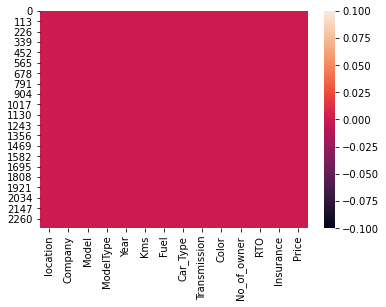

In [2]:
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
sns.heatmap(PRICE_PREDICTION.isnull()) #Looking for null values if any, in heatmap

In [3]:
car = PRICE_PREDICTION.drop(['RTO'], axis = 1) #As RTO information is not required, dropped it

In [4]:
car['Insurance'] = car['Insurance'].str.split(" ,").str[0] #Take the first value of Insurance

In [5]:
car = car.replace({"Insurance":"Not Available"},"Comprehensive") #If Insurance is NOT Available than replace it with Comprehensive

In [6]:
df = car.replace("Not Available", "NaN") #Replace Not Available in NaN

In [7]:
#Corrected Kms and MRP in Rupees
Price = []
import math
for i in range(df.shape[0]):
    df['Kms'][i] = int(df['Kms'][i].replace(",",""))
    amt = df['Price'][i].split(" ")
    amtz = amt[1].replace(",","")
    val = float(amtz)
    try:
        if(amt[2] == "Lakh"):
            value = val*100000
            value = math.ceil(value*100)/100
    except IndexError:
        value = val
    Price.append(value)

In [8]:
df['Price'] = Price

In [9]:
df = df.drop(['Car_Type'], axis = 1) #As Car_Type information is not required, dropped it

In [10]:
df #Printing Dataset

,location,Company,Model,ModelType,Year,Kms,Fuel,Transmission,Color,No_of_owner,Insurance,Price
0,Kolkata,Honda,WR-V,VX MT Petrol,May 2018,37130,Petrol,Manual,Black,First,Comprehensive,740000.0
1,Surat,Mahindra,XUV500,W8,Jun 2013,89000,Diesel,Manual,Purple,First,Comprehensive,650000.0
2,Hyderabad,Nissan,Sunny,XV,Jun 2012,75531,Petrol,Manual,White,Second,Comprehensive,375000.0
3,Chennai,Audi,A4,35 TDI Technology,Sep 2018,96000,Diesel,Automatic,Black,First,Comprehensive,2400000.0
4,Hyderabad,Mahindra,TUV300,T6 Plus,Jan 2016,147500,Diesel,Manual,White,First,Comprehensive,590000.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2360,Mumbai,Toyota,Fortuner,3.0 MT,Feb 2010,120000,Diesel,Manual,White,Second,Comprehensive,925000.0
2361,Mumbai,Volkswagen,Polo,GT TSI,Aug 2016,40000,Petrol,Automatic,Black,Second,Comprehensive,650000.0
2362,Mumbai,Maruti Suzuki,Swift DZire,ZDI AMT,Jul 2017,39000,Diesel,Automatic,Red,First,Comprehensive,825000.0
2363,Delhi,Audi,A3,35 TDI Premium Plus,Apr 2018,20000,Diesel,Automatic,Red,First,Comprehensive,2600000.0


In [11]:
#Reading 3 more Car CSV file
pre1=pd.read_csv("Cars1.CSV",sep=",")
pre2=pd.read_csv("Cars2.CSV",sep=",")
pre3=pd.read_csv("Cars3.CSV",sep=",")
Car=pd.concat((pre1,pre2,pre3),ignore_index=True)

In [12]:
df1 = Car.replace("Not Available", 'NaN') #Replace Not Available in NaN

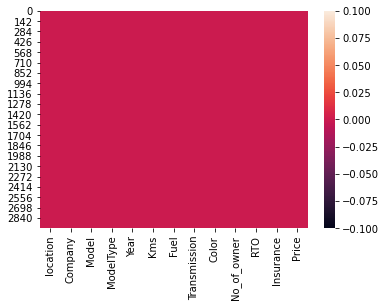

In [13]:
sns.heatmap(df1.isnull()) #Looking for null values if any, in heatmap

In [14]:
new_df = df1[df1['location'] != 'NaN']

In [15]:
new_df.reset_index(inplace = True) #Reseting Index

In [16]:
for i in range(new_df.shape[0]):
    km = new_df['Kms'][i].split(" ")
    new_df['Kms'][i] = int(km[0].replace(",",""))
    amt = new_df['Price'][i].split(" ")
    new_df['Price'][i] = int(amt[1].replace(",",""))

In [17]:
new_df['Transmission'].value_counts() #Finding value count of Transmission

Manual       2381
Automatic     477
NaN            58
Name: Transmission, dtype: int64

In [18]:
new_df = new_df.replace({"Transmission":"NaN"},"Manual") #Replace Nan value of Transmission with Manual

In [19]:
new_df['Fuel'].value_counts()  #Finding value count of Fuel

Petrol           1424
Diesel           1351
CNG & Hybrids      93
NaN                24
LPG                14
Electric           10
Name: Fuel, dtype: int64

In [20]:
new_df = new_df.replace({"Fuel":"NaN"},"Petrol") ##Replace Nan value of Fuel with Petrol

In [21]:
new_df['No_of_owner'].value_counts() #Finding value count of No_of_owner

1st    1700
2nd     896
3rd     178
NaN      93
4th      33
4+       16
Name: No_of_owner, dtype: int64

In [22]:
df['No_of_owner'].value_counts() #Finding value count of No_of_owner of previous dataset

First               1975
Second               342
Third                 21
UnRegistered Car      19
Fourth                 8
Name: No_of_owner, dtype: int64

In [23]:
new_df.replace({"1st": "First", 
                      "2nd": "Second", 
                      "3rd": "Third", 
                      "4th": "Fourth",
                      "4+" : "Fourth"
                     }, inplace = True) #matching type of owners

In [24]:
new_df = new_df.replace({"No_of_owner":"NaN"},"First") #Replace Nan value of No_of_owner with First

In [25]:
#Filling NULL values of RTO and correcting location
for i in range(new_df.shape[0]):
    loc = new_df['location'][i].split(", ")
    if(new_df['RTO'][i] == "NaN"):
        new_df['RTO'][i] = loc[2]
    new_df['location'][i] = loc[1]

In [26]:
new_df

,index,location,Company,Model,ModelType,Year,Kms,Fuel,Transmission,Color,No_of_owner,RTO,Insurance,Price
0,1,Mumbai,Mini,Cooper Countryman,S,2018,17000,Petrol,Manual,NaN,First,MH,Comprehensive,3500000
1,2,Bhiwandi,Volkswagen,Vento,1.6 Trendline,2011,88000,Diesel,Manual,Silver,Second,MH,Third Party,275000
2,3,Mumbai,Toyota,Etios,1.5 V,2012,37800,Petrol,Manual,Blue,First,MH,Comprehensive,360111
3,4,Mumbai,Toyota,Innova,2.5 V 8 STR,2013,97000,Diesel,Manual,Gold,First,MH,No Insurance,949000
4,5,Mumbai,Hyundai,Santro,GLS II - Euro II,2012,77000,Petrol,Manual,Red,First,MH,Comprehensive,249000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2911,2975,Tinsukia,Mahindra,Scorpio,2002-2013 2.6 SLX CRDe,2004,100000,Diesel,Automatic,NaN,Second,Assam,NaN,185000
2912,2976,Jorhat,Tata,Sumo Grande,Grande LX,2009,90000,Diesel,Automatic,NaN,First,Assam,NaN,190000
2913,2977,Jorhat,Renault,KWID,1.0 RXT,2017,25000,Petrol,Manual,NaN,First,Assam,NaN,275000
2914,2978,Dibrugarh,Mahindra,Supro,Others,2021,120,Diesel,Manual,NaN,First,Assam,NaN,170000


In [27]:
new_df = new_df.drop(['index'], axis = 1) #Dropping index as it's not required

In [28]:
new_df = new_df.drop(['RTO'], axis = 1) #Dropping RTO as it's not required

In [29]:
Car=pd.concat((df,new_df),ignore_index=True) #Doing concatination of both the dataframe

In [30]:
Car['Color'].value_counts() #Checking value count for Color

NaN                1710
White              1225
Silver              593
Grey                420
Red                 336
Black               309
Blue                259
Brown               143
Gold                 93
Other                35
Green                29
Bordeaux/Maroon      28
Orange               25
Beige                17
Maroon               14
Bronze               11
Champagne            10
Purple                9
Colorless             7
Lightblue             4
Pink                  3
S Red                 1
Name: Color, dtype: int64

In [31]:
Car = Car.replace({"Color":"NaN"},"White") #Replacing NaN value of color with White

In [32]:
Car['Insurance'].value_counts() #Checking value count for Insurance

Comprehensive    2922
NaN              1823
Third Party       269
No Insurance      210
Zero Dep           56
Yes                 1
Name: Insurance, dtype: int64

In [33]:
Car = Car.replace({"Insurance":"NaN"},"Comprehensive") #Replacing NaN value of Insurance with Comprehensive

In [34]:
#Correcting car year
for i in range(Car.shape[0]):
    loc = Car['Year'][i].split(" ")
    if(len(loc) == 2):
        Car['Year'][i] = loc[1]

In [35]:
Car['Year'] = pd.to_numeric(Car['Year'],errors='coerce') #converting year from object type to numeric

In [36]:
Car['Year'] = Car['Year'].astype(int) #converting from numeric to int

In [37]:
Car = Car.replace({"ModelType":"NaN"},"Others") #Replacing NaN value of ModelType with Others

In [38]:
Car

,location,Company,Model,ModelType,Year,Kms,Fuel,Transmission,Color,No_of_owner,Insurance,Price
0,Kolkata,Honda,WR-V,VX MT Petrol,2018,37130,Petrol,Manual,Black,First,Comprehensive,740000.0
1,Surat,Mahindra,XUV500,W8,2013,89000,Diesel,Manual,Purple,First,Comprehensive,650000.0
2,Hyderabad,Nissan,Sunny,XV,2012,75531,Petrol,Manual,White,Second,Comprehensive,375000.0
3,Chennai,Audi,A4,35 TDI Technology,2018,96000,Diesel,Automatic,Black,First,Comprehensive,2400000.0
4,Hyderabad,Mahindra,TUV300,T6 Plus,2016,147500,Diesel,Manual,White,First,Comprehensive,590000.0
...,...,...,...,...,...,...,...,...,...,...,...,...
5276,Tinsukia,Mahindra,Scorpio,2002-2013 2.6 SLX CRDe,2004,100000,Diesel,Automatic,White,Second,Comprehensive,185000.0
5277,Jorhat,Tata,Sumo Grande,Grande LX,2009,90000,Diesel,Automatic,White,First,Comprehensive,190000.0
5278,Jorhat,Renault,KWID,1.0 RXT,2017,25000,Petrol,Manual,White,First,Comprehensive,275000.0
5279,Dibrugarh,Mahindra,Supro,Others,2021,120,Diesel,Manual,White,First,Comprehensive,170000.0


In [39]:
Car.dtypes

location         object
Company          object
Model            object
ModelType        object
Year              int32
Kms               int64
Fuel             object
Transmission     object
Color            object
No_of_owner      object
Insurance        object
Price           float64
dtype: object

## Univariate Analysis

Total number of Companies are =  37


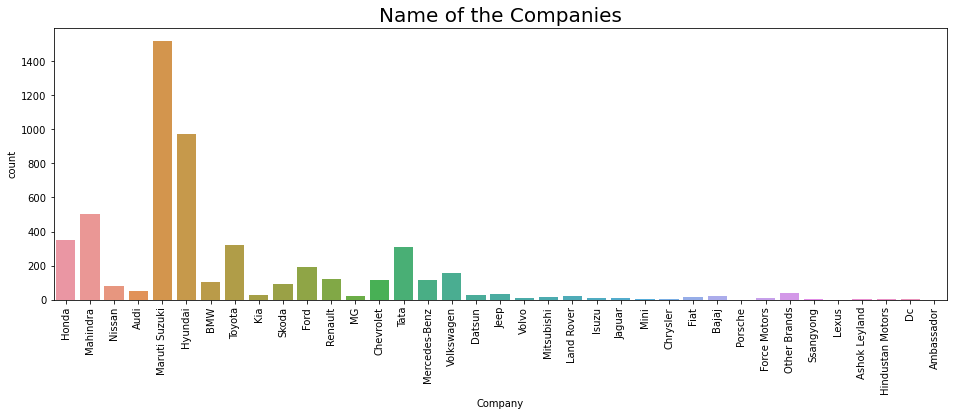

In [40]:
import matplotlib.pyplot as plt
print("Total number of Companies are = ",len(Car['Company'].unique()))
plt.figure(figsize = (16,5))
ax = sns.countplot(x="Company", data=Car)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.title("Name of the Companies", fontsize = 20)
plt.show()

Types of Fule are =  8


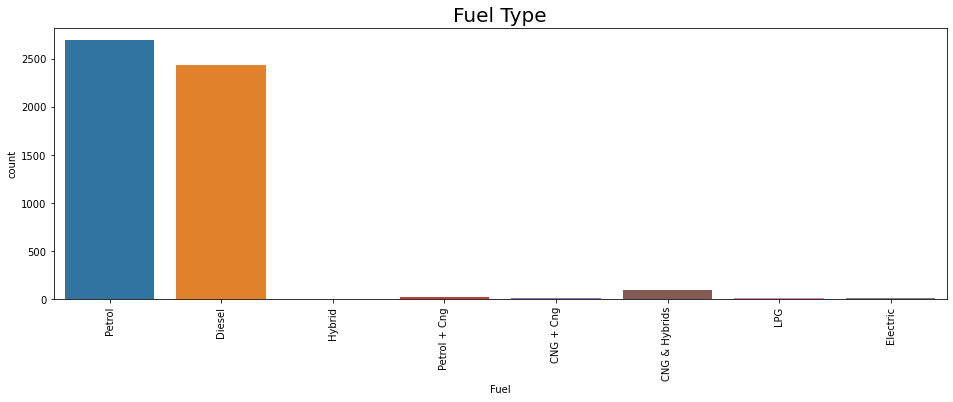

In [41]:
print("Types of Fule are = ",len(Car['Fuel'].unique()))
plt.figure(figsize = (16,5))
ax = sns.countplot(x="Fuel", data=Car)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.title("Fuel Type", fontsize = 20)
plt.show()

Types of Transmission are =  2


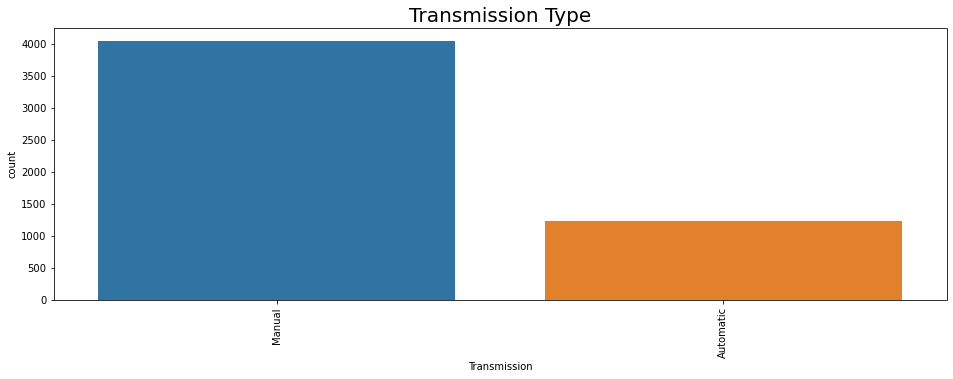

In [42]:
print("Types of Transmission are = ",len(Car['Transmission'].unique()))
plt.figure(figsize = (16,5))
ax = sns.countplot(x="Transmission", data=Car)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.title("Transmission Type", fontsize = 20)
plt.show()

Number of Car Color are =  21


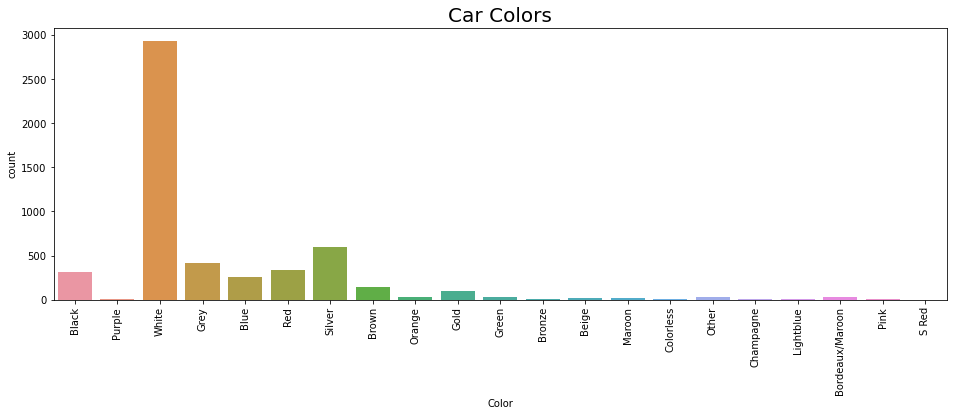

In [43]:
print("Number of Car Color are = ",len(Car['Color'].unique()))
plt.figure(figsize = (16,5))
ax = sns.countplot(x="Color", data=Car)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.title("Car Colors", fontsize = 20)
plt.show()

Number of Owner are =  5


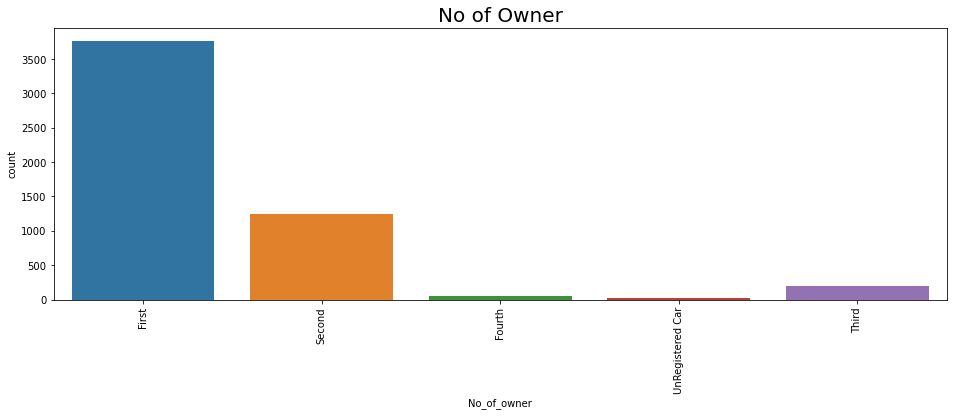

In [44]:
print("Number of Owner are = ",len(Car['No_of_owner'].unique()))
plt.figure(figsize = (16,5))
ax = sns.countplot(x="No_of_owner", data=Car)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.title("No of Owner", fontsize = 20)
plt.show()

Number Insurance Type are =  5


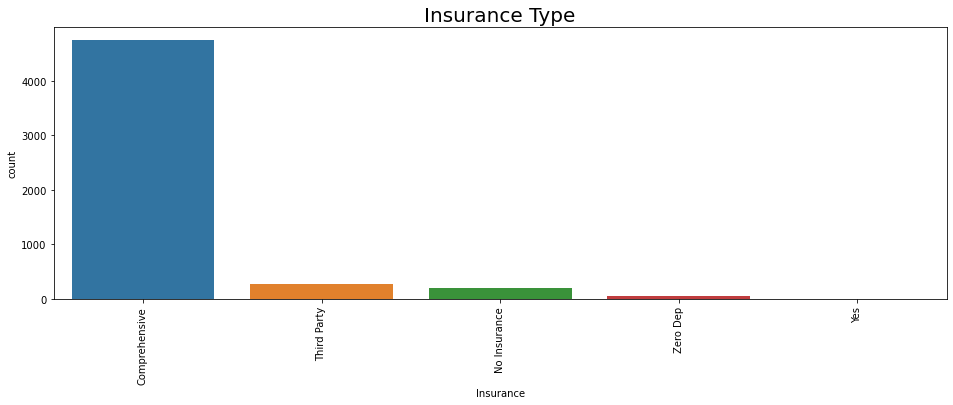

In [45]:
print("Number Insurance Type are = ",len(Car['Insurance'].unique()))
plt.figure(figsize = (16,5))
ax = sns.countplot(x="Insurance", data=Car)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.title("Insurance Type", fontsize = 20)
plt.show()

Number of locations are =  184


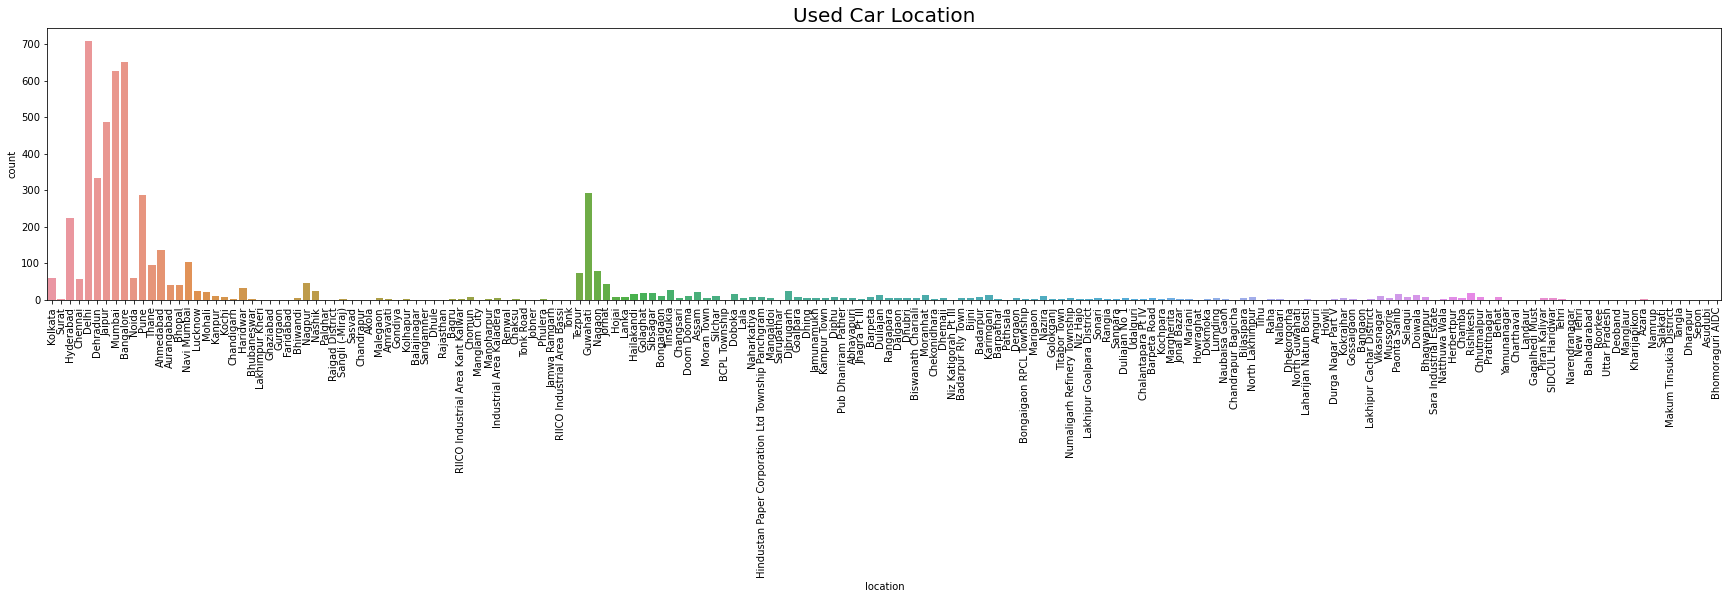

In [46]:
print("Number of locations are = ",len(Car['location'].unique()))
plt.figure(figsize = (30,5))
ax = sns.countplot(x="location", data=Car)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.title("Used Car Location", fontsize = 20)
plt.show()

## Bi-variate Analysis

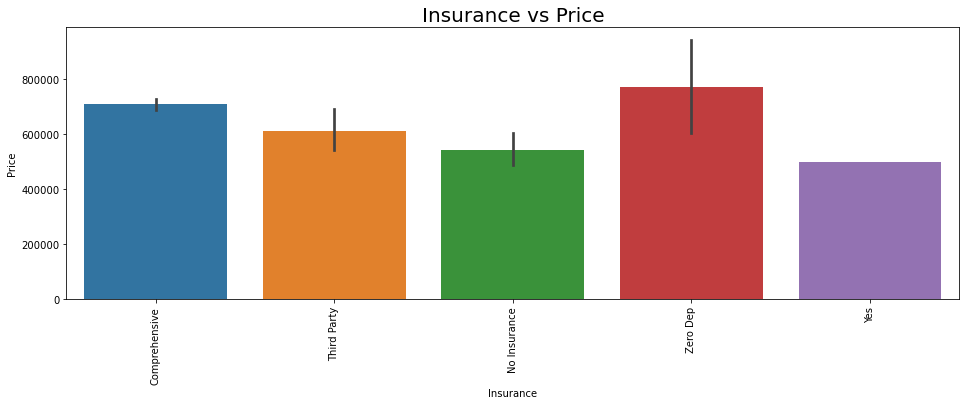

In [47]:
plt.figure(figsize = (16,5))
ax = sns.barplot(x = 'Insurance', y = 'Price', data = Car)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.title("Insurance vs Price", fontsize = 20)
plt.show()

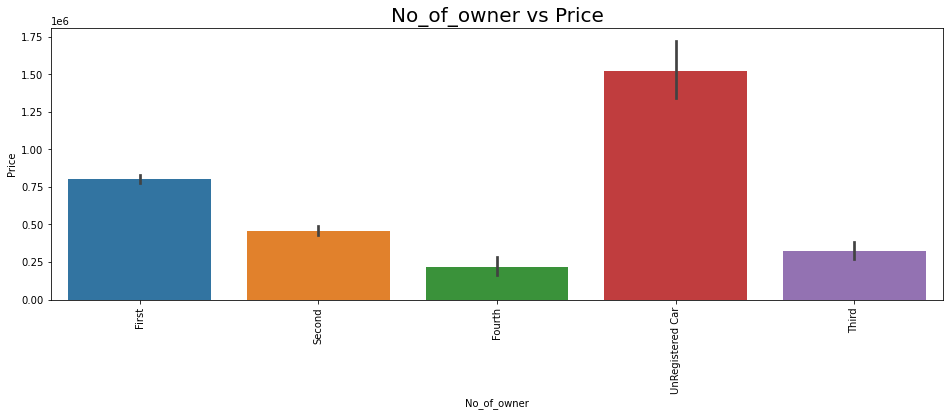

In [48]:
plt.figure(figsize = (16,5))
ax = sns.barplot(x = 'No_of_owner', y = 'Price', data = Car)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.title("No_of_owner vs Price", fontsize = 20)
plt.show()

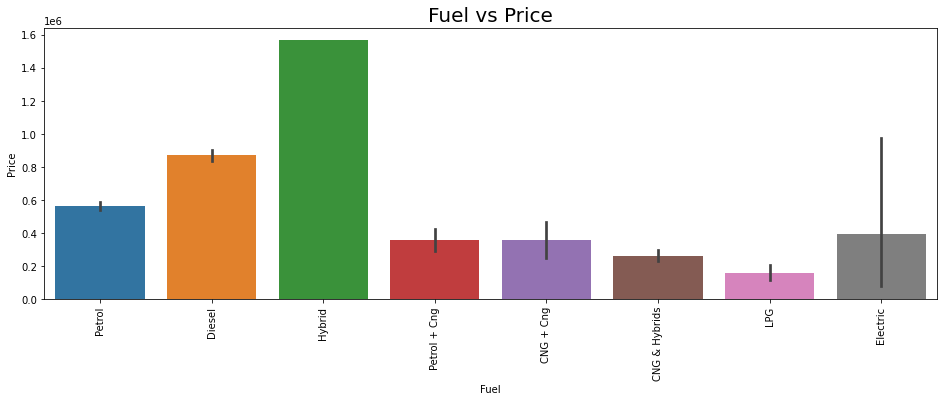

In [49]:
plt.figure(figsize = (16,5))
ax = sns.barplot(x = 'Fuel', y = 'Price', data = Car)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.title("Fuel vs Price", fontsize = 20)
plt.show()

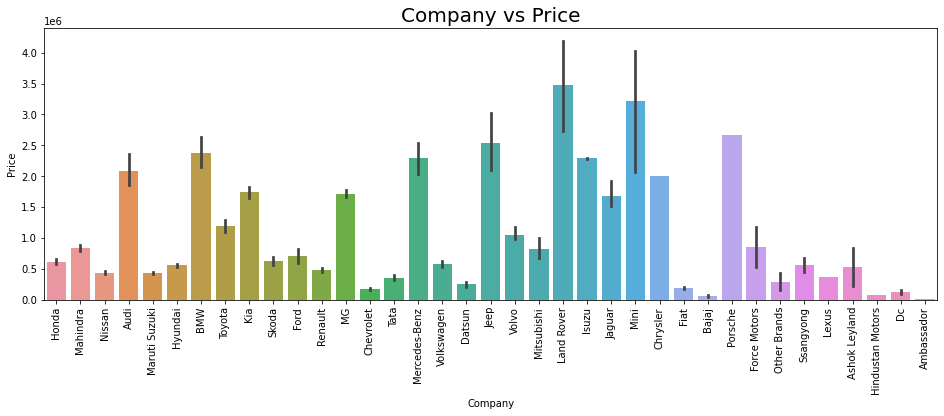

In [50]:
plt.figure(figsize = (16,5))
ax = sns.barplot(x = 'Company', y = 'Price', data = Car)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.title("Company vs Price", fontsize = 20)
plt.show()

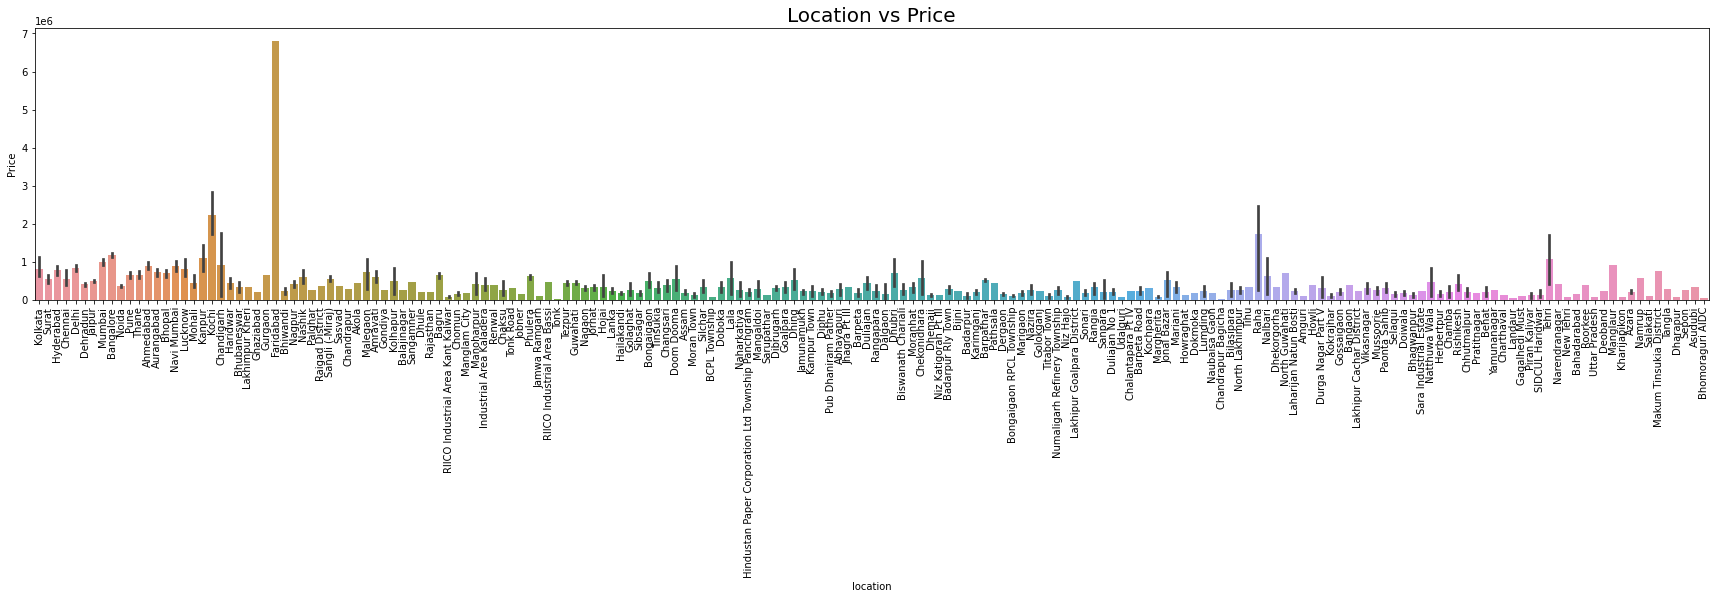

In [51]:
plt.figure(figsize = (30,5))
ax = sns.barplot(x = 'location', y = 'Price', data = Car)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.title("Location vs Price", fontsize = 20)
plt.show()

## Observation-

# Label Encoding

In [52]:
label_list=list(Car.select_dtypes(['object']).columns)
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for i in label_list:
    Car[i] = le.fit_transform(Car[i])

In [53]:
Car

,location,Company,Model,ModelType,Year,Kms,Fuel,Transmission,Color,No_of_owner,Insurance,Price
0,97,13,225,1144,2018,37130,6,1,1,0,0,740000.0
1,170,22,241,1199,2013,89000,2,1,16,0,0,650000.0
2,80,27,201,1227,2012,75531,6,1,20,2,0,375000.0
3,40,2,15,633,2018,96000,2,0,1,0,0,2400000.0
4,80,22,211,1087,2016,147500,2,1,20,0,0,590000.0
...,...,...,...,...,...,...,...,...,...,...,...,...
5276,176,22,192,286,2004,100000,2,0,20,2,0,185000.0
5277,88,33,198,866,2009,90000,2,0,20,0,0,190000.0
5278,88,30,134,12,2017,25000,6,1,20,0,0,275000.0
5279,54,22,203,964,2021,120,2,1,20,0,0,170000.0


# Multi-Variate Analysis

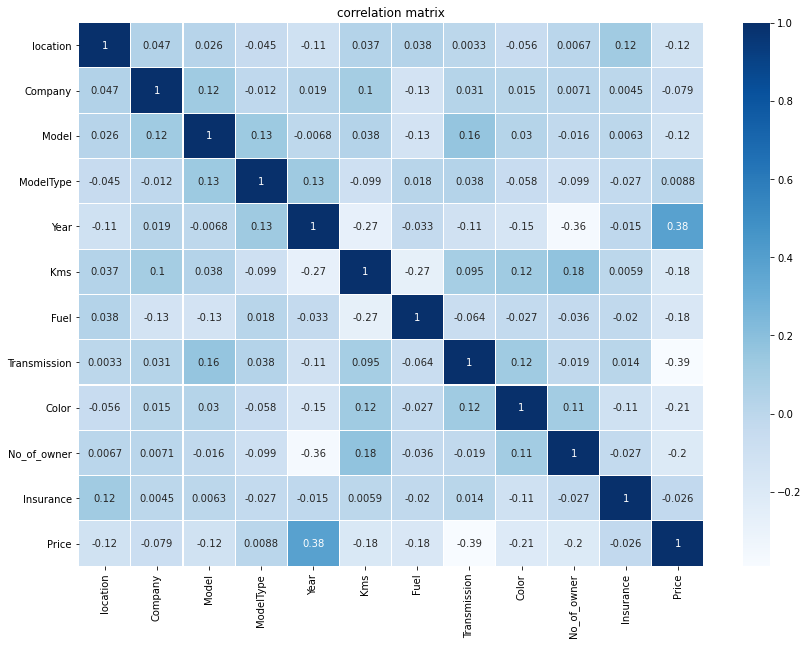

In [54]:
fig=plt.figure(figsize=(14,10))
hc=Car.corr(method='pearson')
sns.heatmap(hc,annot=True,cmap="Blues",linewidths=.1, annot_kws={"size": 10})
plt.title("correlation matrix")
plt.show()

# Checking for Outliers

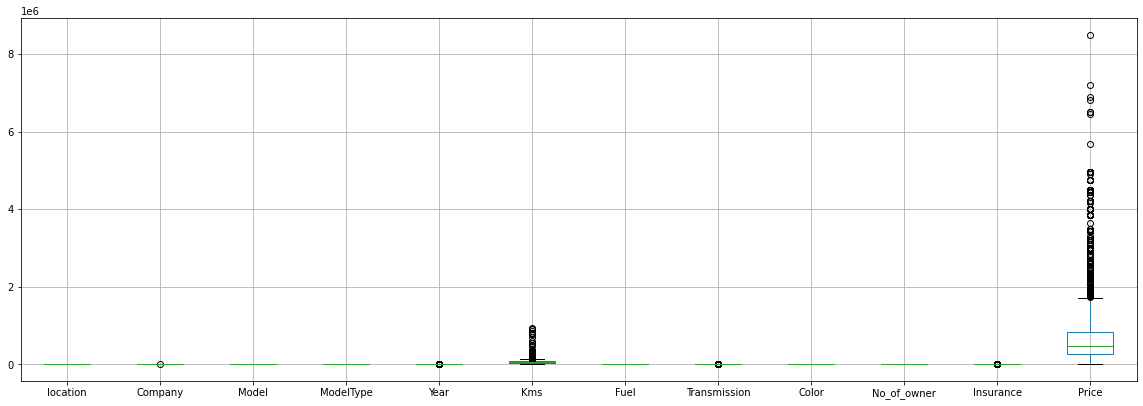

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns
Car.boxplot(figsize=[20,8])
plt.subplots_adjust(bottom=0.25)
plt.show()

# Seperating Input and Output Variables

In [56]:
x = Car.drop(['Price'], axis=1)
y = Car["Price"]

# Scaling

In [57]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler
scaler=MinMaxScaler() #Initializting MinMaxScaler
scale_x=scaler.fit_transform(x) #fitting our data into MinMaxScaller
scaled_x = pd.DataFrame(scale_x, index=x.index, columns=x.columns)
x=scaled_x
x.head() #Priting top 5 rows of our data

,location,Company,Model,ModelType,Year,Kms,Fuel,Transmission,Color,No_of_owner,Insurance
0,0.530055,0.361111,0.885827,0.881356,0.965116,0.039925,0.857143,1.0,0.05,0.0,0.0
1,0.928962,0.611111,0.948819,0.923729,0.906977,0.095699,0.285714,1.0,0.80,0.0,0.0
2,0.437158,0.750000,0.791339,0.945300,0.895349,0.081216,0.857143,1.0,1.00,0.5,0.0
3,0.218579,0.055556,0.059055,0.487673,0.965116,0.103226,0.285714,0.0,0.05,0.0,0.0
4,0.437158,0.611111,0.830709,0.837442,0.941860,0.158602,0.285714,1.0,1.00,0.0,0.0


# Finding Best Random State

In [58]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
maxR2_Score=0
maxRS=0
for i in range(100,125):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.30,random_state=i)
    RF = RandomForestRegressor()
    RF.fit(x_train, y_train)
    predrf = RF.predict(x_test)
    score = r2_score(y_test, predrf)
    if score>maxR2_Score:
        maxR2_Score=score
        maxRS=i
print("Best accuracy is",maxR2_Score," on Random_state ",maxRS)

Best accuracy is 0.9411785612240203  on Random_state  120


# Train Test Split

In [59]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=maxRS)

# Finding Best Algorithm

In [60]:
#importing all the required libraries to find best Algorithm
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import Ridge
from sklearn.svm import SVR
from sklearn.model_selection import cross_val_score

In [61]:
model=[LinearRegression(),RandomForestRegressor(),DecisionTreeRegressor(),KNeighborsRegressor(),GradientBoostingRegressor(),Ridge(),SVR()]

In [62]:
for m in model:
    print("*******************************************************************************")
    print("|||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||")
    print('accuracy score of ->', m)
    m.fit(x_train,y_train)
    pred = m.predict(x_test)
    print("R2 Score:                ", r2_score(y_test,pred))
    print("Mean Absolute Error:     ", mean_absolute_error(y_test,pred))
    print("Mean Squared error:      ", mean_squared_error(y_test,pred))
    print("Root Mean Squared Error: ", np.sqrt(mean_squared_error(y_test,pred)))
    score=cross_val_score(m,x,y,cv=8)
    print(score)
    print("cross validation score:  ",score.mean())
    print("Difference between R2 score and cross validatio score is - ",r2_score(y_test,pred)-abs(score.mean()))
    print("|||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||")
    print("*******************************************************************************")

*******************************************************************************
|||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||
accuracy score of -> LinearRegression()
R2 Score:                 0.3979956390065177
Mean Absolute Error:      348179.8504065433
Mean Squared error:       292679573364.76843
Root Mean Squared Error:  540998.6814815433
[ 0.28239608  0.33746338  0.33606765  0.31048683  0.2418123  -0.14478279
 -1.21195601 -0.80759542]
cross validation score:   -0.08201349924323054
Difference between R2 score and cross validatio score is -  0.31598213976328715
|||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||
*******************************************************************************
*******************************************************************************
|||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||
accuracy score of -> RandomForestRegressor()
R2 Score:                 0.942

# Hyper Parameter Tuning

In [63]:
from sklearn.model_selection import GridSearchCV

parameters = {"max_depth":range(21,25),
              "criterion":['mse'],
              "max_features": ['auto', 'sqrt'],
              "min_samples_leaf":range(1,5)}

clf = GridSearchCV(RandomForestRegressor(), parameters, refit = True, verbose = 3)

clf.fit(x_train,y_train) #fitting train and test data

Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV] criterion=mse, max_depth=21, max_features=auto, min_samples_leaf=1 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  criterion=mse, max_depth=21, max_features=auto, min_samples_leaf=1, score=0.787, total=   0.8s
[CV] criterion=mse, max_depth=21, max_features=auto, min_samples_leaf=1 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.7s remaining:    0.0s


[CV]  criterion=mse, max_depth=21, max_features=auto, min_samples_leaf=1, score=0.802, total=   0.8s
[CV] criterion=mse, max_depth=21, max_features=auto, min_samples_leaf=1 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.5s remaining:    0.0s


[CV]  criterion=mse, max_depth=21, max_features=auto, min_samples_leaf=1, score=0.885, total=   0.8s
[CV] criterion=mse, max_depth=21, max_features=auto, min_samples_leaf=1 
[CV]  criterion=mse, max_depth=21, max_features=auto, min_samples_leaf=1, score=0.768, total=   0.8s
[CV] criterion=mse, max_depth=21, max_features=auto, min_samples_leaf=1 
[CV]  criterion=mse, max_depth=21, max_features=auto, min_samples_leaf=1, score=0.787, total=   0.7s
[CV] criterion=mse, max_depth=21, max_features=auto, min_samples_leaf=2 
[CV]  criterion=mse, max_depth=21, max_features=auto, min_samples_leaf=2, score=0.784, total=   0.7s
[CV] criterion=mse, max_depth=21, max_features=auto, min_samples_leaf=2 
[CV]  criterion=mse, max_depth=21, max_features=auto, min_samples_leaf=2, score=0.804, total=   0.7s
[CV] criterion=mse, max_depth=21, max_features=auto, min_samples_leaf=2 
[CV]  criterion=mse, max_depth=21, max_features=auto, min_samples_leaf=2, score=0.895, total=   0.7s
[CV] criterion=mse, max_depth

[CV]  criterion=mse, max_depth=22, max_features=auto, min_samples_leaf=3, score=0.772, total=   0.7s
[CV] criterion=mse, max_depth=22, max_features=auto, min_samples_leaf=3 
[CV]  criterion=mse, max_depth=22, max_features=auto, min_samples_leaf=3, score=0.781, total=   0.6s
[CV] criterion=mse, max_depth=22, max_features=auto, min_samples_leaf=3 
[CV]  criterion=mse, max_depth=22, max_features=auto, min_samples_leaf=3, score=0.890, total=   0.7s
[CV] criterion=mse, max_depth=22, max_features=auto, min_samples_leaf=3 
[CV]  criterion=mse, max_depth=22, max_features=auto, min_samples_leaf=3, score=0.751, total=   0.6s
[CV] criterion=mse, max_depth=22, max_features=auto, min_samples_leaf=3 
[CV]  criterion=mse, max_depth=22, max_features=auto, min_samples_leaf=3, score=0.802, total=   0.6s
[CV] criterion=mse, max_depth=22, max_features=auto, min_samples_leaf=4 
[CV]  criterion=mse, max_depth=22, max_features=auto, min_samples_leaf=4, score=0.769, total=   0.6s
[CV] criterion=mse, max_depth

[CV]  criterion=mse, max_depth=23, max_features=auto, min_samples_leaf=4, score=0.746, total=   0.7s
[CV] criterion=mse, max_depth=23, max_features=auto, min_samples_leaf=4 
[CV]  criterion=mse, max_depth=23, max_features=auto, min_samples_leaf=4, score=0.799, total=   0.6s
[CV] criterion=mse, max_depth=23, max_features=sqrt, min_samples_leaf=1 
[CV]  criterion=mse, max_depth=23, max_features=sqrt, min_samples_leaf=1, score=0.800, total=   0.4s
[CV] criterion=mse, max_depth=23, max_features=sqrt, min_samples_leaf=1 
[CV]  criterion=mse, max_depth=23, max_features=sqrt, min_samples_leaf=1, score=0.832, total=   0.5s
[CV] criterion=mse, max_depth=23, max_features=sqrt, min_samples_leaf=1 
[CV]  criterion=mse, max_depth=23, max_features=sqrt, min_samples_leaf=1, score=0.896, total=   0.5s
[CV] criterion=mse, max_depth=23, max_features=sqrt, min_samples_leaf=1 
[CV]  criterion=mse, max_depth=23, max_features=sqrt, min_samples_leaf=1, score=0.764, total=   0.4s
[CV] criterion=mse, max_depth

[CV]  criterion=mse, max_depth=24, max_features=sqrt, min_samples_leaf=2, score=0.811, total=   0.4s
[CV] criterion=mse, max_depth=24, max_features=sqrt, min_samples_leaf=2 
[CV]  criterion=mse, max_depth=24, max_features=sqrt, min_samples_leaf=2, score=0.894, total=   0.4s
[CV] criterion=mse, max_depth=24, max_features=sqrt, min_samples_leaf=2 
[CV]  criterion=mse, max_depth=24, max_features=sqrt, min_samples_leaf=2, score=0.756, total=   0.4s
[CV] criterion=mse, max_depth=24, max_features=sqrt, min_samples_leaf=2 
[CV]  criterion=mse, max_depth=24, max_features=sqrt, min_samples_leaf=2, score=0.814, total=   0.4s
[CV] criterion=mse, max_depth=24, max_features=sqrt, min_samples_leaf=3 
[CV]  criterion=mse, max_depth=24, max_features=sqrt, min_samples_leaf=3, score=0.773, total=   0.3s
[CV] criterion=mse, max_depth=24, max_features=sqrt, min_samples_leaf=3 
[CV]  criterion=mse, max_depth=24, max_features=sqrt, min_samples_leaf=3, score=0.797, total=   0.3s
[CV] criterion=mse, max_depth

[Parallel(n_jobs=1)]: Done 160 out of 160 | elapsed:  1.4min finished


GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'criterion': ['mse'], 'max_depth': range(21, 25),
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': range(1, 5)},
             verbose=3)

In [64]:
clf.best_params_  #Best parameters

{'criterion': 'mse',
 'max_depth': 21,
 'max_features': 'sqrt',
 'min_samples_leaf': 1}

In [65]:
clf_pred=clf.best_estimator_.predict(x_test)

In [66]:
r2_score(y_test, clf_pred)

0.9441445648442222

Our model learnt approx 94.41%

# Saving the model

In [67]:
import joblib
joblib.dump(clf.best_estimator_,"Carz.obj")
RF_from_joblib=joblib.load('Carz.obj')
Predicted = RF_from_joblib.predict(x_test)
Predicted

array([ 949088.57142857,  221606.0001    , 4200000.        , ...,
        370000.        ,  300000.        ,  150445.64112564])

In [68]:
pd.set_option("display.max_rows", None, "display.max_columns", None)
pd.DataFrame([RF_from_joblib.predict(x_test)[:],y_test[:]],index=["Predicted","Original"])

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,500,501,502,503,504,505,506,507,508,509,510,511,512,513,514,515,516,517,518,519,520,521,522,523,524,525,526,527,528,529,530,531,532,533,534,535,536,537,538,539,540,541,542,543,544,545,546,547,548,549,550,551,552,553,554,555,556,557,558,559,560,561,562,563,564,565,566,567,568,569,570,571,572,573,574,575,576,577,578,579,580,581,582,583,584,585,586,587,588,589,590,591,592,593,594,595,596,597,598,599,600,601,602,603,604,605,606,607,608,609,610,611,612,613,614,615,616,617,618,619,620,621,622,623,624,625,626,627,628,629,630,631,632,633,634,635,636,637,638,639,640,641,642,643,644,645,646,647,648,649,650,651,652,653,654,655,656,657,658,659,660,661,662,663,664,665,666,667,668,669,670,671,672,673,674,675,676,677,678,679,680,681,682,683,684,685,686,687,688,689,690,691,692,693,694,695,696,697,698,699,700,701,702,703,704,705,706,707,708,709,710,711,712,713,714,715,716,717,718,719,720,721,722,723,724,725,726,727,728,729,730,731,732,733,734,735,736,737,738,739,740,741,742,743,744,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783,784,785,786,787,788,789,790,791,792,793,794,795,796,797,798,799,800,801,802,803,804,805,806,807,808,809,810,811,812,813,814,815,816,817,818,819,820,821,822,823,824,825,826,827,828,829,830,831,832,833,834,835,836,837,838,839,840,841,842,843,844,845,846,847,848,849,850,851,852,853,854,855,856,857,858,859,860,861,862,863,864,865,866,867,868,869,870,871,872,873,874,875,876,877,878,879,880,881,882,883,884,885,886,887,888,889,890,891,892,893,894,895,896,897,898,899,900,901,902,903,904,905,906,907,908,909,910,911,912,913,914,915,916,917,918,919,920,921,922,923,924,925,926,927,928,929,930,931,932,933,934,935,936,937,938,939,940,941,942,943,944,945,946,947,948,949,950,951,952,953,954,955,956,957,958,959,960,961,962,963,964,965,966,967,968,969,970,971,972,973,974,975,976,977,978,979,980,981,982,983,984,985,986,987,988,989,990,991,992,993,994,995,996,997,998,999,1000,1001,1002,1003,1004,1005,1006,1007,1008,1009,1010,1011,1012,1013,1014,1015,1016,1017,1018,1019,1020,1021

# Plotting Actual vs Predicted Results

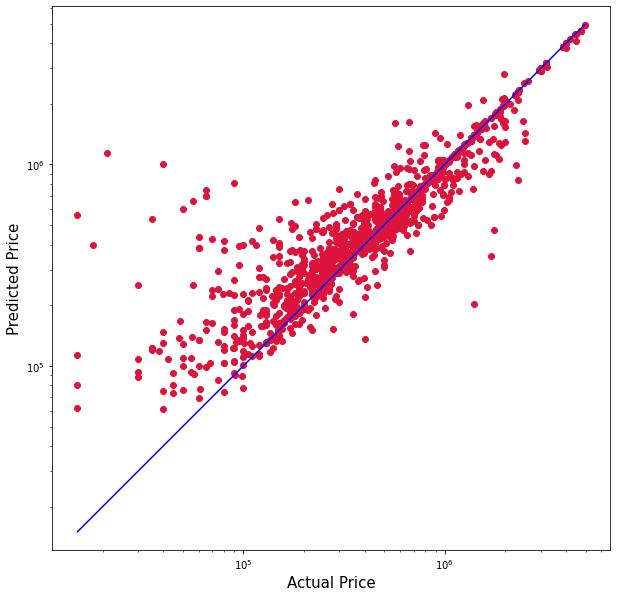

In [69]:
plt.figure(figsize=(10,10))
plt.scatter(y_test, Predicted, c='crimson')
plt.yscale('log')
plt.xscale('log')
p1 = max(max(Predicted), max(y_test))
p2 = min(min(Predicted), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('Actual Price', fontsize=15)
plt.ylabel('Predicted Price', fontsize=15)
plt.axis('equal')
plt.show()